# Entrega Nº4

## Dataset Flights

Javier Ceferino Rodriguez
Maria Eva Ortega 
Julio Gonzalez
Gonzalo Estevez

## Introduccion

En el siguiente trabajo analizamos el dataset de vuelos con el objetivo de reforzar las trayectorias con mas demanda para lograr aumentar las ganancias y mejorar la experiencia de los pasajeros.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

In [2]:
def read_dataset(file_name):
    """
    Lee un archivo csv y lo devuelve como un DataFrame
    """
    return pd.read_csv(file_name, index_col=0)

df = read_dataset('./flights.csv')
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


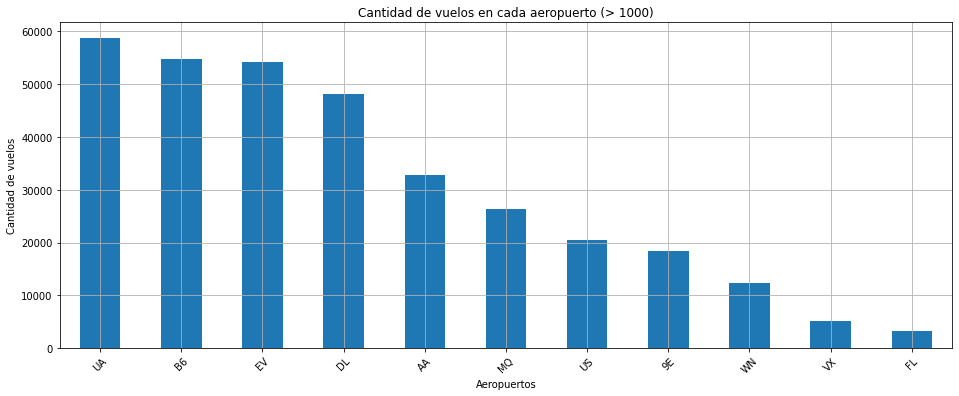

In [3]:
plt.rcParams.update({'font.size': 12})
df_count_vuelos = df['carrier'].value_counts()
df_count_vuelos[:-5] \
    .plot(
        kind="bar",
        figsize=(16,6),
        grid=True,
        title="Cantidad de vuelos en cada aeropuerto (> 1000)",
        xlabel="Aeropuertos",
        ylabel="Cantidad de vuelos"
    )
plt.xticks(rotation=45);

A partir de lo observado en el gráfico anterior, vamos a enfocar nuestro análisis en el Carrier UA ya que es la aerolinea con la mayor cantidad de vuelos. Sin embargo este analisis sencillamente se podria aplicar al resto de las aerolineas de este dataset.

In [4]:
df_carrier_UA = df.loc[df['carrier'] == 'UA']
df_carrier_UA

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
13,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01 06:00:00
14,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336724,2013,9,30,2052.0,2059,-7.0,2315.0,2358,-43.0,UA,1416,N68453,EWR,MCO,123.0,937,20,59,2013-09-30 20:00:00
336729,2013,9,30,2055.0,2059,-4.0,2158.0,2211,-13.0,UA,1066,N16701,EWR,BOS,40.0,200,20,59,2013-09-30 20:00:00
336738,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,UA,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-09-30 21:00:00
336756,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-09-30 21:00:00


Realizamos el siguiente gráfico para tener una primera aproximaciòn a la cantidad de vuelos distribuidos de acuerdo a los aeropuertos de origen.

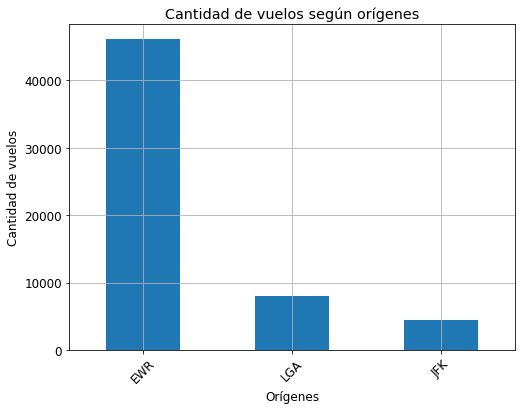

In [5]:
plt.rcParams.update({'font.size': 12})

df_origin_UA = df_carrier_UA['origin'].value_counts()
df_origin_UA.plot(
    kind="bar",
    figsize=(8,6),
    grid=True,
    title="Cantidad de vuelos según orígenes",
    xlabel="Orígenes",
    ylabel="Cantidad de vuelos"
)
plt.xticks(rotation=45);

Creamos una máscara para trabajar con las columnas que consideramos significativas para este anàlisis, en este caso las columanas de origen, destino y tiempo de demora entre vuelos.

In [6]:
df_mask_UA = df_carrier_UA[['origin', 'dest', 'dep_delay']]
df_mask_UA

,origin,dest,dep_delay
1,EWR,IAH,2.0
2,LGA,IAH,4.0
6,EWR,ORD,-4.0
13,JFK,LAX,-2.0
14,EWR,SFO,-2.0
...,...,...,...
336724,EWR,MCO,-7.0
336729,EWR,BOS,-4.0
336738,EWR,IAH,-1.0
336756,EWR,BOS,-7.0


Creamos una nueva tabla para poder observar la cantidad de vuelos en sus distintas trayectorias, ordenándolos de acuerdo a la cantidad de vuelos en forma descendente.

In [7]:
df_origin_dest = df_carrier_UA.groupby(['origin', 'dest'])['origin'].count().reset_index(name='count').sort_values(['count'], ascending=False)
df_origin_dest[:10] # Veo los primeros 10

,origin,dest,count
41,EWR,SFO,4344
19,EWR,IAH,3973
30,EWR,ORD,3822
23,EWR,LAX,3764
4,EWR,BOS,3342
24,EWR,MCO,3217
52,LGA,ORD,3162
51,LGA,IAH,2951
48,JFK,SFO,2475
15,EWR,FLL,2407


Realizamos un gráfico de barras para poder visualizar los datos de la tabla anterior. En este caso, establecimos un filtro para las trayectorias, entre un origen y un destino determinados, de más de mil vuelos.

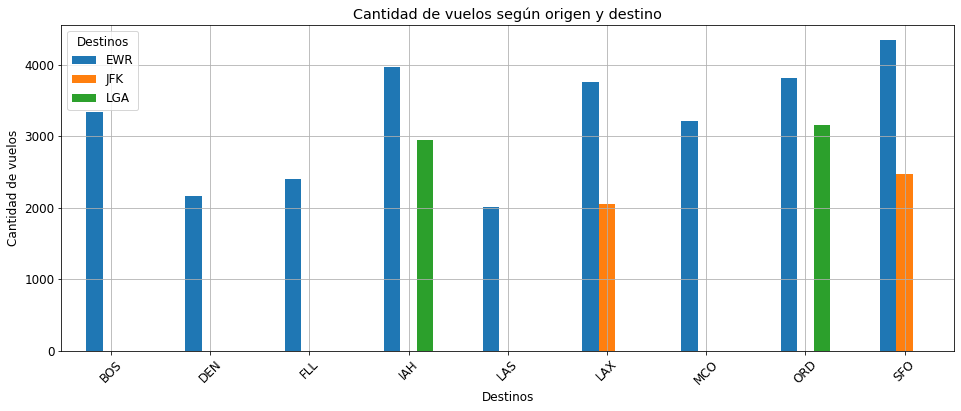

In [8]:
plt.rcParams.update({'font.size': 12})

df_mask_vuelos = df_origin_dest[df_origin_dest['count'] > 2000]
ax = df_mask_vuelos \
        .pivot_table(index='dest', columns='origin', values='count') \
        .plot.bar(
            figsize=(16,6), 
            grid=True, 
            title="Cantidad de vuelos según origen y destino",
            xlabel="Destinos",
            ylabel="Cantidad de vuelos"
        ) \
        .legend(title="Destinos")
plt.xticks(rotation=45);
# for container in ax.containers:
#     ax.bar_label(container)

Importamos el dataset que contiene las especificaciones de cada avión a fin de realizar un análisis exploratorio para poder determinar las implicaciones en nuestro análisis. 

In [9]:
df_planes = read_dataset('./planes.csv')
df_planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
2,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
5,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3318,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3319,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3320,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3321,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [10]:
df_joined = pd.merge(df_carrier_UA, df_planes, on='tailnum', how='inner')
df_joined[:10]

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,2013-01-01 05:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
1,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,40,2013-01-08 14:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2,2013,1,9,717.0,700,17.0,812.0,815,-3.0,UA,...,0,2013-01-09 07:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
3,2013,1,9,1143.0,1144,-1.0,1425.0,1445,-20.0,UA,...,44,2013-01-09 11:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
4,2013,1,13,835.0,824,11.0,1030.0,951,39.0,UA,...,24,2013-01-13 08:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
5,2013,1,16,1829.0,1730,59.0,2117.0,2023,54.0,UA,...,30,2013-01-16 17:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
6,2013,1,22,1902.0,1808,54.0,2214.0,2106,68.0,UA,...,8,2013-01-22 18:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
7,2013,1,23,1050.0,1056,-6.0,1143.0,1208,-25.0,UA,...,56,2013-01-23 10:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
8,2013,1,23,1533.0,1529,4.0,1641.0,1645,-4.0,UA,...,29,2013-01-23 15:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
9,2013,1,25,724.0,720,4.0,1000.0,1023,-23.0,UA,...,20,2013-01-25 07:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan


In [11]:
df_joined["seats"].value_counts()

149    19048
178    12837
200     9641
191     7558
179     6546
292      532
275      493
330      290
255       13
400        8
260        6
Name: seats, dtype: int64

In [12]:
df_joined["engines"].value_counts()

2    56972
Name: engines, dtype: int64

In [13]:
df_joined["engine"].value_counts()

Turbo-fan    31676
Turbo-jet    25296
Name: engine, dtype: int64

In [14]:
df_joined["speed"].value_counts()

Series([], Name: speed, dtype: int64)

In [15]:
df_origin_dest_joined = df_joined.groupby(['origin', 'dest', 'seats'])['origin'].count().reset_index(name='count').sort_values(['count'], ascending=False)
df_origin_dest_joined[:10] # Veo los primeros 10

,origin,dest,seats,count
192,JFK,SFO,178,2238
189,JFK,LAX,178,1936
162,EWR,SFO,149,1677
11,EWR,BOS,149,1461
204,LGA,IAH,149,1459
76,EWR,LAX,178,1439
210,LGA,ORD,179,1214
54,EWR,IAH,149,1198
86,EWR,MCO,178,1154
165,EWR,SFO,191,1104


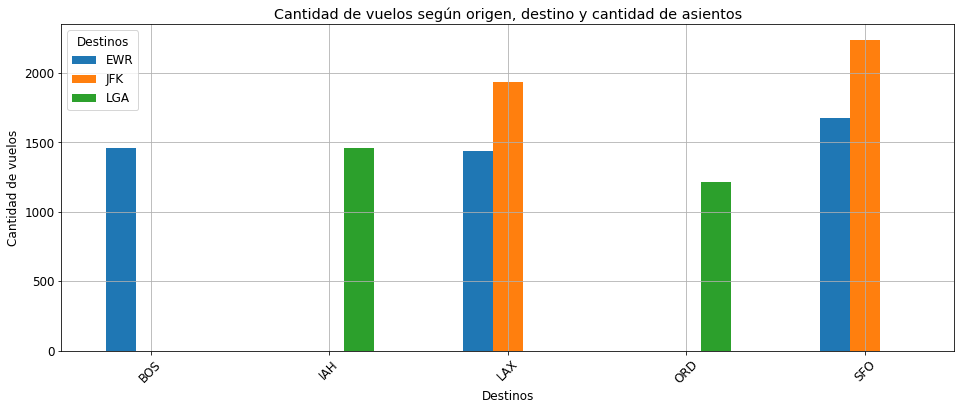

In [16]:
plt.rcParams.update({'font.size': 12})

# Filtro por > 1200 para enfocarme en los que tienen mayor cantidad de vuelos
df_mask_vuelos_joined = df_origin_dest_joined[df_origin_dest_joined['count'] > 1200]
axj = df_mask_vuelos_joined \
            .pivot_table(index='dest', columns='origin', values='count') \
            .plot.bar(
                figsize=(16,6), 
                grid=True, 
                title="Cantidad de vuelos según origen, destino y cantidad de asientos",
                xlabel="Destinos",
                ylabel="Cantidad de vuelos",
            ) \
            .legend(title="Destinos")
plt.xticks(rotation=45);
# for container in axj.containers:
#     axj.bar_label(container, padding=3, fontsize=16) # , fmt="%i")